# Introduction to Breadth-First Search (BFS)

Breadth-First Search (BFS) is another fundamental graph traversal algorithm. Unlike DFS, BFS explores neighbors of a node before moving on to the next level of neighbors. This approach ensures that all nodes at the present "depth" are visited before moving on to nodes at the next depth level, making it useful for shortest path finding and discovering the shortest path in unweighted graphs.

## Graphs in Breadth-First Search

To understand BFS, it's important to understand the underlying structure of graphs:

### Nodes and Edges

- **Nodes (Vertices):** Represent entities such as cities, intersections, or any discrete entity.
- **Edges:** Represent the paths or connections between nodes, either directed or undirected.

## Key Concepts

### Traversal Order

- BFS starts at a specified node and explores all its neighbors at the present depth level before moving on to nodes at the next depth level.
- It uses a queue data structure to manage the order of nodes to be visited.

### Applications

- **Shortest Path Finding:** BFS can be used to find the shortest path between two nodes in an unweighted graph.
- **Minimum Spanning Tree:** It's useful for finding the minimum spanning tree of a graph.

## How BFS Works

1. **Initialization:** Start at a given node and mark it as visited.
2. **Explore:** Visit all adjacent nodes (neighbors) at the current depth level.
3. **Queue Management:** Enqueue each neighbor to a queue after visiting to ensure the next depth level is processed in order.
4. **Dequeue and Repeat:** Dequeue the next node from the queue and repeat the process until all nodes are visited.

### Visualize

![Breadth-First Search](https://upload.wikimedia.org/wikipedia/commons/5/5d/Breadth-First-Search-Algorithm.gif)


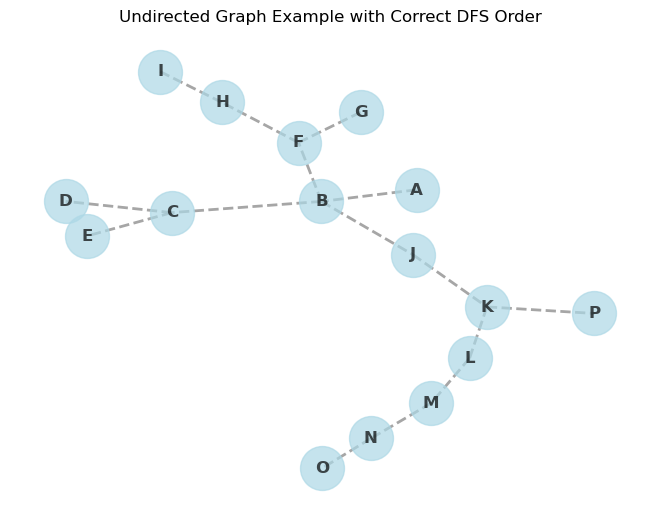

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
P = nx.Graph()

# Add nodes
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P"]
P.add_nodes_from(nodes)

# Add edges without weights


graph = {
    'A': ['B'],
    'B': ['C', 'F', 'J'],
    'C': ['D', 'E'],
    'D': [],
    'E': [],
    'F': ['G', 'H'],
    'G': [],
    'H': ['I'],
    'I': [],
    'J': ['K'],
    'K': ['L', 'P'],
    'L': ['M'],
    'M': ['N'],
    'N': ['O'],
    'O': []
}

edges = []


# Iterate over each node and its neighbors in the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        edges.append((node, neighbor))

P.add_edges_from(edges)

pos = nx.spring_layout(P, seed=42)  # Positions for all nodes with a fixed seed for reproducibility
nx.draw(
    P,
    pos,
    with_labels=True,
    node_color="lightblue",
    font_weight="bold",
    node_size=1000,
    edge_color="gray",
    width=2,
    alpha=0.7,
    style="dashed",
)
plt.title("Undirected Graph Example with Correct DFS Order")
plt.show()


In [5]:
def bfs(graph, start_node):
    visited = []  # List to keep track of visited nodes in order
    queue = [start_node]  # Initialize queue with the start node

    count_iterations = 1

    while queue:
        print(f"\n------ Iteration {count_iterations} ------\n")
        print("Current queue:", queue)
        print("Visited nodes:", visited)
        
        node = queue.pop(0)  # Dequeue the first node
        if node not in visited:
            visited.append(node)  # Append node to visited list
            print(f"Visiting node: {node}")

            # Iterate over neighbors in the order they appear
            neighbors = graph.get(node, [])  # Get neighbors of the current node
            count_node_iterations = 1
            
            print(f"Iterating neighbors of {node}:")
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append(neighbor)
                    print(f"  Adding neighbor '{neighbor}' to queue")

                count_node_iterations += 1
            
        count_iterations += 1

    print("\nBFS traversal completed.")
    print("Visited nodes in BFS order:", visited)

bfs(graph, 'A')



------ Iteration 1 ------

Current queue: ['A']
Visited nodes: []
Visiting node: A
Iterating neighbors of A:
  Adding neighbor 'B' to queue

------ Iteration 2 ------

Current queue: ['B']
Visited nodes: ['A']
Visiting node: B
Iterating neighbors of B:
  Adding neighbor 'C' to queue
  Adding neighbor 'F' to queue
  Adding neighbor 'J' to queue

------ Iteration 3 ------

Current queue: ['C', 'F', 'J']
Visited nodes: ['A', 'B']
Visiting node: C
Iterating neighbors of C:
  Adding neighbor 'D' to queue
  Adding neighbor 'E' to queue

------ Iteration 4 ------

Current queue: ['F', 'J', 'D', 'E']
Visited nodes: ['A', 'B', 'C']
Visiting node: F
Iterating neighbors of F:
  Adding neighbor 'G' to queue
  Adding neighbor 'H' to queue

------ Iteration 5 ------

Current queue: ['J', 'D', 'E', 'G', 'H']
Visited nodes: ['A', 'B', 'C', 'F']
Visiting node: J
Iterating neighbors of J:
  Adding neighbor 'K' to queue

------ Iteration 6 ------

Current queue: ['D', 'E', 'G', 'H', 'K']
Visited nodes: 